In [2]:
import json
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [14]:
# nama_file_json = "disk-statistic.json"
nama_file_json = "disk-statistic-pandas.json"

In [15]:
def load_dictionary_from_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

In [16]:
dictionary = load_dictionary_from_json(nama_file_json)

In [17]:
dictionary

{'Model': {'0': 'LMFRNet',
  '1': 'MobileNetV3',
  '2': 'RestNet50',
  '3': 'ShuffleNetV2'},
 'Disk File Size (bytes)': {'0': '2729435.00',
  '1': '4438162.00',
  '2': '96453930.00',
  '3': '96453930.00'},
 'Disk File Size KB)': {'0': '2665.46',
  '1': '4334.14',
  '2': '94193.29',
  '3': '94193.29'},
 'Disk File Size (MB)': {'0': '2.60', '1': '4.23', '2': '91.99', '3': '91.99'},
 'Model Size': {'0': '2563480.00',
  '1': '4349656.00',
  '2': '96345264.00',
  '3': '23615528.00'},
 'FLOPS': {'0': '2617534656.00',
  '1': '61012088.00',
  '2': '4132219392.00',
  '3': '596706232.00'},
 'Number of Parameters': {'0': '635706.00',
  '1': '1075234.00',
  '2': '24033090.00',
  '3': '5870054.00'}}

In [18]:
for model_name in dictionary:
    print(model_name + ':')
    print( dictionary[model_name])

Model:
{'0': 'LMFRNet', '1': 'MobileNetV3', '2': 'RestNet50', '3': 'ShuffleNetV2'}
Disk File Size (bytes):
{'0': '2729435.00', '1': '4438162.00', '2': '96453930.00', '3': '96453930.00'}
Disk File Size KB):
{'0': '2665.46', '1': '4334.14', '2': '94193.29', '3': '94193.29'}
Disk File Size (MB):
{'0': '2.60', '1': '4.23', '2': '91.99', '3': '91.99'}
Model Size:
{'0': '2563480.00', '1': '4349656.00', '2': '96345264.00', '3': '23615528.00'}
FLOPS:
{'0': '2617534656.00', '1': '61012088.00', '2': '4132219392.00', '3': '596706232.00'}
Number of Parameters:
{'0': '635706.00', '1': '1075234.00', '2': '24033090.00', '3': '5870054.00'}


In [19]:
df = pd.DataFrame.from_dict(dictionary)

In [20]:
df.head()

,Model,Disk File Size (bytes),Disk File Size KB),Disk File Size (MB),Model Size,FLOPS,Number of Parameters
0,LMFRNet,2729435.00,2665.46,2.60,2563480.00,2617534656.00,635706.00
1,MobileNetV3,4438162.00,4334.14,4.23,4349656.00,61012088.00,1075234.00
2,RestNet50,96453930.00,94193.29,91.99,96345264.00,4132219392.00,24033090.00
3,ShuffleNetV2,96453930.00,94193.29,91.99,23615528.00,596706232.00,5870054.00


In [70]:
column_names = df.columns
column_names[1:]

Index(['Disk File Size (bytes)', 'Disk File Size KB)', 'Disk File Size (MB)',
       'Model Size', 'FLOPS', 'Number of Parameters'],
      dtype='object')

In [96]:
min_values =df[df.columns[1:]].apply(pd.to_numeric, errors='coerce').min()

In [97]:
# values as exponential
min_values.values

array([2.7294350e+06, 2.6654600e+03, 2.6000000e+00, 2.5634800e+06,
       6.1012088e+07, 6.3570600e+05])

In [109]:
# formating values as float with 2 digits decimal
all_min_values = min_values.apply(lambda x: f'{x:.2f}')

In [110]:
# check values has change to format 2 digits decimal
all_min_values.values

array(['2729435.00', '2665.46', '2.60', '2563480.00', '61012088.00',
       '635706.00'], dtype=object)

C:\Users\ptipd\AppData\Local\Temp\ipykernel_19332\972022724.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (str_text == str(all_min_values[col-1])):


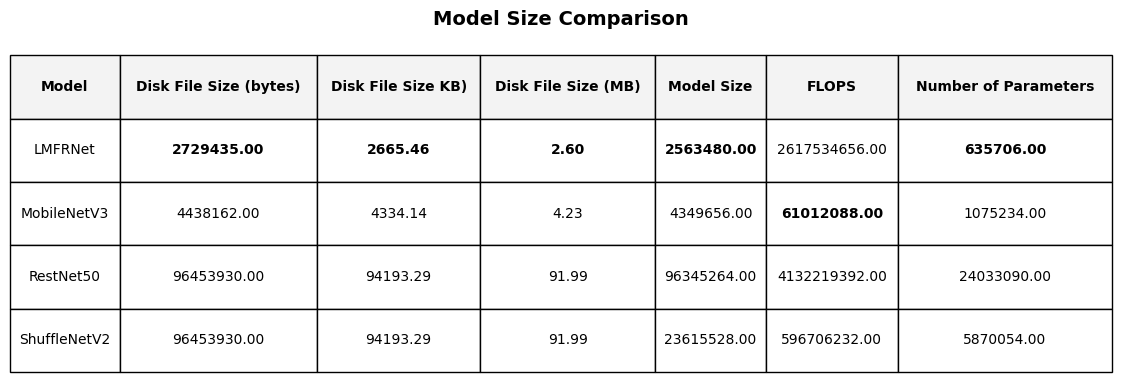

In [111]:
plt.figure(figsize=(6, 4))

# Hide axes
ax = plt.gca()
ax.axis('off')

# Create table
table = plt.table(
    cellText=df.values,
    colLabels=df.columns,
    loc='center',
    cellLoc='center',
    colColours=['#f3f3f3'] * len(df.columns)
)

for (row, col), cell in table.get_celld().items():
    if row > 0:
        if col > 0:
            str_text = cell.get_text().get_text()
            # print(str_text + ' - ' + str(min_values[col-1]))
            if (str_text == str(all_min_values[col-1])):
                cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    else:
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))

# Adjust layout
table.auto_set_column_width(col=list(range(len(df.columns))))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2.2, 3.8)  # Adjust cell size

plt.title('Model Size Comparison', pad=25, fontweight='bold', fontsize='14')
plt.show()

In [112]:
new_df = df.drop(df.columns[[1, 2]], axis=1)
new_df

,Model,Disk File Size (MB),Model Size,FLOPS,Number of Parameters
0,LMFRNet,2.60,2563480.00,2617534656.00,635706.00
1,MobileNetV3,4.23,4349656.00,61012088.00,1075234.00
2,RestNet50,91.99,96345264.00,4132219392.00,24033090.00
3,ShuffleNetV2,91.99,23615528.00,596706232.00,5870054.00


In [113]:
min_values = all_min_values[2:]
min_values

Disk File Size (MB)            2.60
Model Size               2563480.00
FLOPS                   61012088.00
Number of Parameters      635706.00
dtype: object

C:\Users\ptipd\AppData\Local\Temp\ipykernel_19332\2852586465.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (str_text == str(min_values[col-1])):


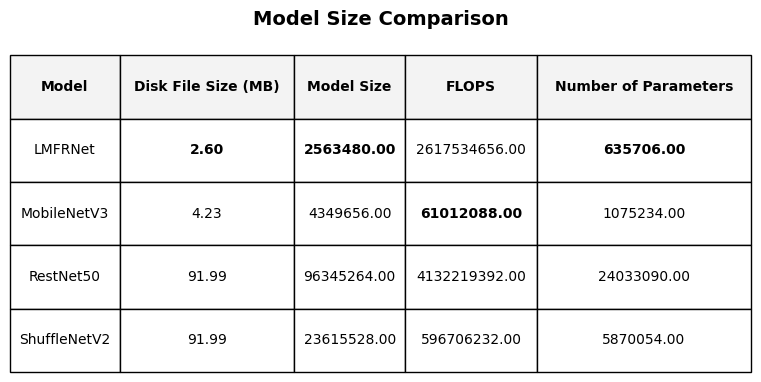

In [114]:
plt.figure(figsize=(6, 4))

# Hide axes
ax = plt.gca()
ax.axis('off')

# Create table
table = plt.table(
    cellText=new_df.values,
    colLabels=new_df.columns,
    loc='center',
    cellLoc='center',
    colColours=['#f3f3f3'] * len(new_df.columns)
)

for (row, col), cell in table.get_celld().items():
    if row > 0:
        if col > 0:
            str_text = cell.get_text().get_text()
            # print(str_text + ' - ' + str(min_values[col-1]))
            if (str_text == str(min_values[col-1])):
                cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    else:
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))

# Adjust layout
table.auto_set_column_width(col=list(range(len(new_df.columns))))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2.2, 3.8)  # Adjust cell size

plt.title('Model Size Comparison', pad=25, fontweight='bold', fontsize='14')
plt.show()

In [3]:
file_hasil_test = "build_model_rgb_mtcnn-with-dataset-fitting-face-resource-v2-json/semua.json"

In [4]:
import json

try:
    with open(file_hasil_test, 'r') as file:
        data_train_eval = json.load(file)
        print(data_train_eval)
except FileNotFoundError:
    print("Error: The file {file_hasil_test} was not found.")
except json.JSONDecodeError:
    print("Error: The file {file_hasil_test} contains invalid JSON.")

[{'model': 'shufflenetv2', 'trial': [{'trial': 0, 'data': {'train': [{'loss': 0.202, 'accuracy': 0.9860203862190247}, {'loss': 0.1815, 'accuracy': 0.9886564016342163}, {'loss': 0.1906, 'accuracy': 0.9896814227104187}, {'loss': 0.1373, 'accuracy': 0.9908432364463806}, {'loss': 0.1546, 'accuracy': 0.9917176961898804}], 'eval': [{'loss': 82.49025214529681, 'accuracy': 0.9810142517089844, 'precision': 0.9674017429351807, 'recall': 0.9960513114929199, 'f1score': 0.981517493724823, 'specificity': 0.9958268127281692, 'auroc': 0.980827808380127, 'inference_time': 143.5258605480194, 'cpu_usage': 2.2357142857142858, 'memory_usage': 30.749571119035995, 'gpu_usage': 0.55078125, 'gpu_memory_usage': 0.11056295652238149}, {'loss': 131.84176617270236, 'accuracy': 0.9810142517089844, 'precision': 0.9923312664031982, 'recall': 0.969530463218689, 'f1score': 0.9807983636856079, 'specificity': 0.9702002931118237, 'auroc': 0.9810171127319336, 'inference_time': 138.7101285457611, 'cpu_usage': 2.1293650793650

In [5]:
model_name=[]
trial_no=[]
train_loss = []
train_accuracy = []
for res in data_train_eval:
    # print(res)
    nama_model = res['model']
    trial_model = res['trial']

    # print(trial_model)
    for trial in trial_model:
        # print(trial)
        number_trial = trial['trial']        
        data_train = trial['data']['train']
        # print(number_trial)
        # print(data_train)
        _loss = []
        _accuracy = []
        for train in data_train:
            _loss.append(train['loss'])
            _accuracy.append(train['accuracy'])
        # print(_loss)
        # print(_accuracy)
        model_name.append(nama_model)
        trial_no.append(number_trial)
        train_loss.append(_loss)
        train_accuracy.append(_accuracy)
        # print(train_loss)

dict_data_train_loss = {
    "model": model_name,
    "trial_no": trial_no,
    "loss": train_loss
}

print(dict_data_train_loss)

dict_data_train_accuracy = {
    "model": model_name,
    "trial_no": trial_no,
    "accuracy": train_accuracy
}

print(dict_data_train_accuracy)

{'model': ['shufflenetv2', 'shufflenetv2', 'shufflenetv2', 'shufflenetv2', 'shufflenetv2', 'mobilenetv3', 'mobilenetv3', 'mobilenetv3', 'mobilenetv3', 'mobilenetv3', 'resnet50', 'resnet50', 'resnet50', 'resnet50', 'resnet50', 'lmfrnet', 'lmfrnet', 'lmfrnet', 'lmfrnet', 'lmfrnet'], 'trial_no': [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4], 'loss': [[0.202, 0.1815, 0.1906, 0.1373, 0.1546], [1.7222, 0.4458, 0.3682, 0.2935, 0.2967], [0.1102, 0.0738, 0.0809, 0.0719, 0.0712], [0.0501, 0.0414, 0.0313, 0.1089, 0.0663], [0.0148, 0.0136, 0.015, 0.0213, 0.0147], [1.8656, 0.8546, 0.6349, 0.5461, 0.4642], [0.7334, 0.8369, 0.8683, 0.703, 0.5818], [0.2803, 0.1971, 0.1932, 0.1722, 0.1627], [0.0619, 0.0369, 0.0288, 0.028, 0.0257], [0.0076, 0.0066, 0.006, 0.0083, 0.0068], [2.5229, 1.3527, 1.2002, 0.9422, 0.8173], [1.2413, 1.5979, 0.7164, 0.5436, 1.4625], [0.7971, 0.3029, 0.2316, 0.204, 0.1737], [0.0801, 0.0723, 0.0546, 0.0527, 0.0529], [0.0693, 0.0195, 0.0175, 0.0175, 0.0194], [1.98, 1.01

In [6]:
df_loss = pd.DataFrame.from_dict(dict_data_train_loss)
df_accuracy = pd.DataFrame.from_dict(dict_data_train_accuracy)
df_loss.head()

,model,trial_no,loss
0,shufflenetv2,0,"[0.202, 0.1815, 0.1906, 0.1373, 0.1546]"
1,shufflenetv2,1,"[1.7222, 0.4458, 0.3682, 0.2935, 0.2967]"
2,shufflenetv2,2,"[0.1102, 0.0738, 0.0809, 0.0719, 0.0712]"
3,shufflenetv2,3,"[0.0501, 0.0414, 0.0313, 0.1089, 0.0663]"
4,shufflenetv2,4,"[0.0148, 0.0136, 0.015, 0.0213, 0.0147]"


          model  trial_no                                      loss
0  shufflenetv2         0   [0.202, 0.1815, 0.1906, 0.1373, 0.1546]
1  shufflenetv2         1  [1.7222, 0.4458, 0.3682, 0.2935, 0.2967]
2  shufflenetv2         2  [0.1102, 0.0738, 0.0809, 0.0719, 0.0712]
3  shufflenetv2         3  [0.0501, 0.0414, 0.0313, 0.1089, 0.0663]
4  shufflenetv2         4   [0.0148, 0.0136, 0.015, 0.0213, 0.0147]

Exploded DataFrame:
          model  trial_no    loss
0  shufflenetv2         0   0.202
0  shufflenetv2         0  0.1815
0  shufflenetv2         0  0.1906
0  shufflenetv2         0  0.1373
0  shufflenetv2         0  0.1546
1  shufflenetv2         1  1.7222
1  shufflenetv2         1  0.4458
1  shufflenetv2         1  0.3682
1  shufflenetv2         1  0.2935
1  shufflenetv2         1  0.2967
2  shufflenetv2         2  0.1102
2  shufflenetv2         2  0.0738
2  shufflenetv2         2  0.0809
2  shufflenetv2         2  0.0719
2  shufflenetv2         2  0.0712
3  shufflenetv2         3  

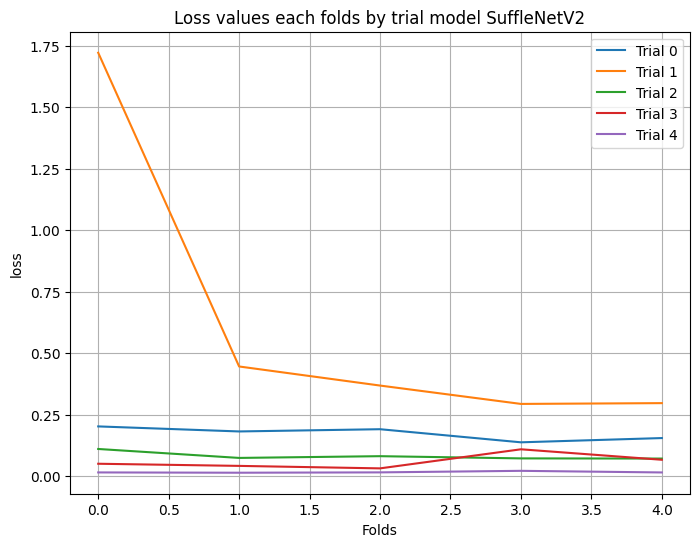

In [7]:
shufflenetv2_df = df_loss[df_loss['model'] == 'shufflenetv2']
print(shufflenetv2_df)

df_exploded = shufflenetv2_df.explode('loss')

print("\nExploded DataFrame:")
print(df_exploded)

plt.figure(figsize=(8, 6))
for trial in df_exploded['trial_no'].unique():
    subset = df_exploded[df_exploded['trial_no'] == trial]
    # You might need to add an index or sequential number for the x-axis if 'Values' are not ordered
    # For simplicity here, we'll just plot the 'Values' against their implicit order within each category
    plt.plot(subset['loss'].reset_index(drop=True), label=f'Trial {trial}')

plt.xlabel("Folds")
plt.ylabel("loss")
plt.title("Loss values each folds by trial model SuffleNetV2")
plt.legend()
plt.grid(True)
plt.show()

         model  trial_no                                      loss
5  mobilenetv3         0  [1.8656, 0.8546, 0.6349, 0.5461, 0.4642]
6  mobilenetv3         1   [0.7334, 0.8369, 0.8683, 0.703, 0.5818]
7  mobilenetv3         2  [0.2803, 0.1971, 0.1932, 0.1722, 0.1627]
8  mobilenetv3         3   [0.0619, 0.0369, 0.0288, 0.028, 0.0257]
9  mobilenetv3         4   [0.0076, 0.0066, 0.006, 0.0083, 0.0068]

Exploded DataFrame:
         model  trial_no    loss
5  mobilenetv3         0  1.8656
5  mobilenetv3         0  0.8546
5  mobilenetv3         0  0.6349
5  mobilenetv3         0  0.5461
5  mobilenetv3         0  0.4642
6  mobilenetv3         1  0.7334
6  mobilenetv3         1  0.8369
6  mobilenetv3         1  0.8683
6  mobilenetv3         1   0.703
6  mobilenetv3         1  0.5818
7  mobilenetv3         2  0.2803
7  mobilenetv3         2  0.1971
7  mobilenetv3         2  0.1932
7  mobilenetv3         2  0.1722
7  mobilenetv3         2  0.1627
8  mobilenetv3         3  0.0619
8  mobilenetv3  

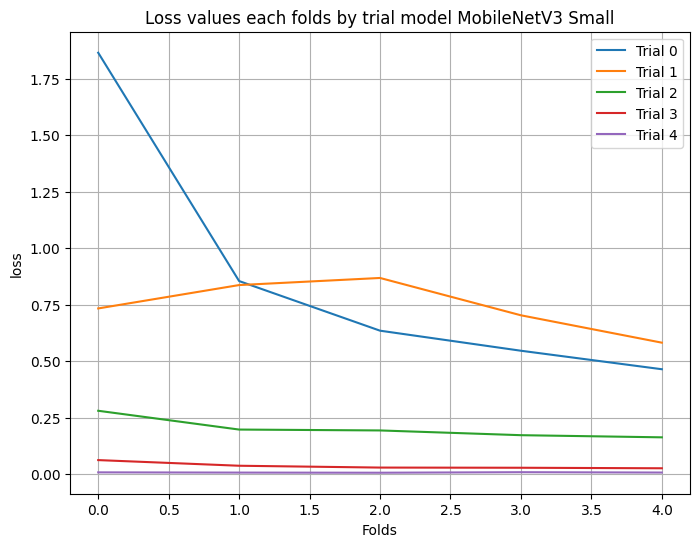

In [8]:
shufflenetv2_df = df_loss[df_loss['model'] == 'mobilenetv3']
print(shufflenetv2_df)

df_exploded = shufflenetv2_df.explode('loss')

print("\nExploded DataFrame:")
print(df_exploded)

plt.figure(figsize=(8, 6))
for trial in df_exploded['trial_no'].unique():
    subset = df_exploded[df_exploded['trial_no'] == trial]
    # You might need to add an index or sequential number for the x-axis if 'Values' are not ordered
    # For simplicity here, we'll just plot the 'Values' against their implicit order within each category
    plt.plot(subset['loss'].reset_index(drop=True), label=f'Trial {trial}')

plt.xlabel("Folds")
plt.ylabel("loss")
plt.title("Loss values each folds by trial model MobileNetV3 Small")
plt.legend()
plt.grid(True)
plt.show()

       model  trial_no                                      loss
10  resnet50         0  [2.5229, 1.3527, 1.2002, 0.9422, 0.8173]
11  resnet50         1  [1.2413, 1.5979, 0.7164, 0.5436, 1.4625]
12  resnet50         2   [0.7971, 0.3029, 0.2316, 0.204, 0.1737]
13  resnet50         3  [0.0801, 0.0723, 0.0546, 0.0527, 0.0529]
14  resnet50         4  [0.0693, 0.0195, 0.0175, 0.0175, 0.0194]

Exploded DataFrame:
       model  trial_no    loss
10  resnet50         0  2.5229
10  resnet50         0  1.3527
10  resnet50         0  1.2002
10  resnet50         0  0.9422
10  resnet50         0  0.8173
11  resnet50         1  1.2413
11  resnet50         1  1.5979
11  resnet50         1  0.7164
11  resnet50         1  0.5436
11  resnet50         1  1.4625
12  resnet50         2  0.7971
12  resnet50         2  0.3029
12  resnet50         2  0.2316
12  resnet50         2   0.204
12  resnet50         2  0.1737
13  resnet50         3  0.0801
13  resnet50         3  0.0723
13  resnet50         3  0.0546


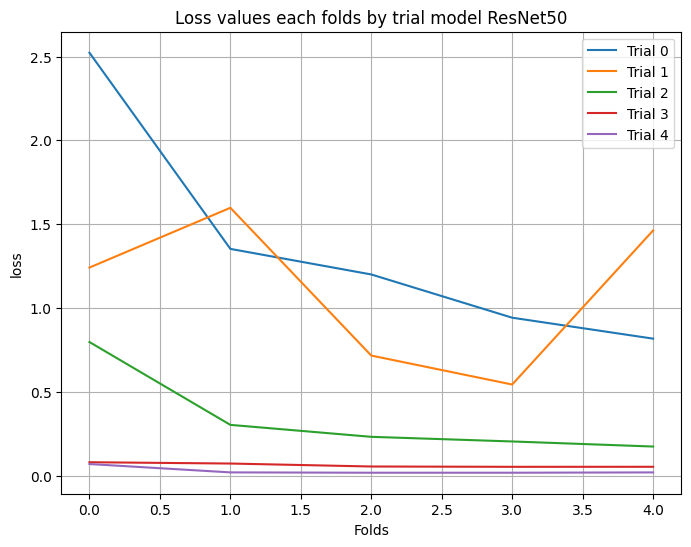

In [9]:
shufflenetv2_df = df_loss[df_loss['model'] == 'resnet50']
print(shufflenetv2_df)

df_exploded = shufflenetv2_df.explode('loss')

print("\nExploded DataFrame:")
print(df_exploded)

plt.figure(figsize=(8, 6))
for trial in df_exploded['trial_no'].unique():
    subset = df_exploded[df_exploded['trial_no'] == trial]
    # You might need to add an index or sequential number for the x-axis if 'Values' are not ordered
    # For simplicity here, we'll just plot the 'Values' against their implicit order within each category
    plt.plot(subset['loss'].reset_index(drop=True), label=f'Trial {trial}')

plt.xlabel("Folds")
plt.ylabel("loss")
plt.title("Loss values each folds by trial model ResNet50")
plt.legend()
plt.grid(True)
plt.show()

Original DataFrame:
  Category        Values
0        A     [1, 2, 3]
1        B        [4, 5]
2        C  [6, 7, 8, 9]

Exploded DataFrame:
  Category Values
0        A      1
0        A      2
0        A      3
1        B      4
1        B      5
2        C      6
2        C      7
2        C      8
2        C      9


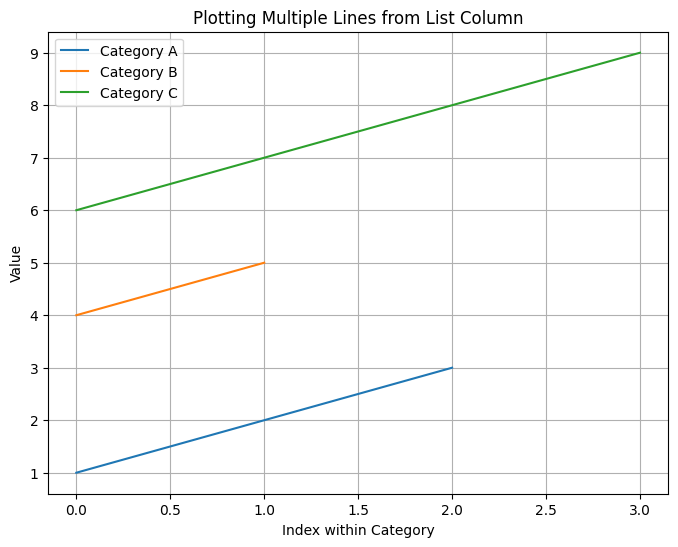

In [10]:
# 1. Create a DataFrame with a column containing lists
data = {'Category': ['A', 'B', 'C'],
        'Values': [[1, 2, 3], [4, 5], [6, 7, 8, 9]]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# 2. Use explode() to flatten the 'Values' column
df_exploded = df.explode('Values')

print("\nExploded DataFrame:")
print(df_exploded)

# 3. Plot the exploded DataFrame
# Assuming you want a line for each 'Category'
plt.figure(figsize=(8, 6))
for category in df_exploded['Category'].unique():
    subset = df_exploded[df_exploded['Category'] == category]
    # You might need to add an index or sequential number for the x-axis if 'Values' are not ordered
    # For simplicity here, we'll just plot the 'Values' against their implicit order within each category
    plt.plot(subset['Values'].reset_index(drop=True), label=f'Category {category}')

plt.xlabel("Index within Category")
plt.ylabel("Value")
plt.title("Plotting Multiple Lines from List Column")
plt.legend()
plt.grid(True)
plt.show()

0, 0
0, 1
1, 0
1, 1


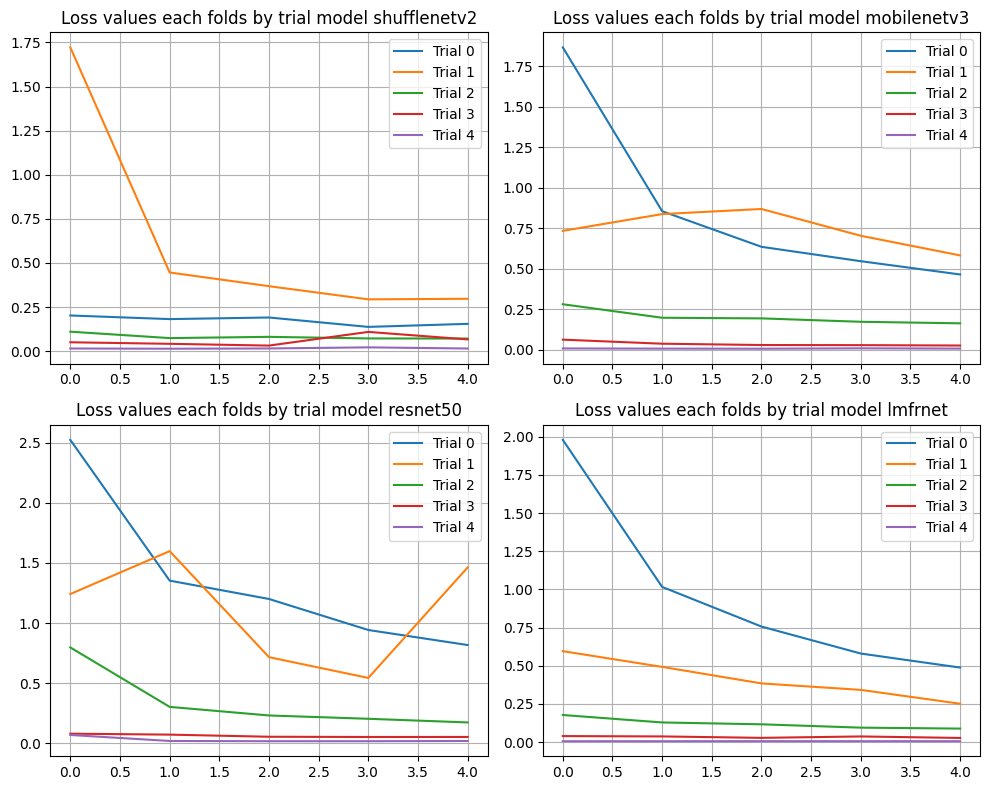

In [11]:
nama_model = ['shufflenetv2', 'mobilenetv3', 'resnet50', 'lmfrnet']

row = 0
col = 0

fig, axs = plt.subplots(2, 2, figsize=(10, 8)) # 2 rows, 2 columns, and set figure size

for model in nama_model:
    if (col>0) and ((col % 2) == 0):
        col = 0
        row += 1
        
    model_df = df_loss[df_loss['model'] == model]
    # print(shufflenetv2_df)

    df_exploded = model_df.explode('loss')

    # print("\nExploded DataFrame:")
    # print(df_exploded)
    print(f"{row}, {col}")

    # trial =  df_exploded['trial_no'].unique()
    # subset = df_exploded[df_exploded['trial_no'] == trial]

    for trial in df_exploded['trial_no'].unique():
        subset = df_exploded[df_exploded['trial_no'] == trial]
        # plt.plot(subset['loss'].reset_index(drop=True), label=f'Trial {trial}')
        # print(trial)
        axs[row, col].plot(subset['loss'].reset_index(drop=True), label=f'Trial {trial}')
        axs[row, col].set_title(f'Loss values each folds by trial model {model}')
        axs[row, col].legend()
        axs[row, col].grid(True)

    col += 1

plt.tight_layout()
# plt.title("Train loss each modesl")

# Display the plot
plt.show()

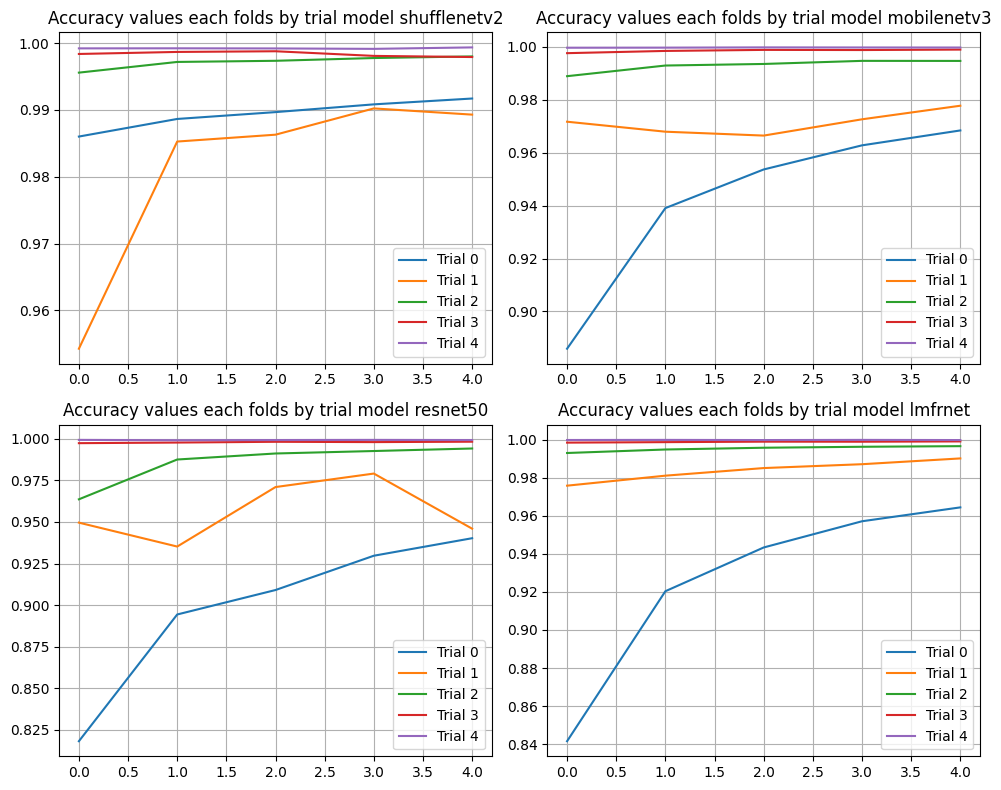

In [12]:
nama_model = ['shufflenetv2', 'mobilenetv3', 'resnet50', 'lmfrnet']

row = 0
col = 0

fig, axs = plt.subplots(2, 2, figsize=(10, 8)) # 2 rows, 2 columns, and set figure size

for model in nama_model:
    if (col>0) and ((col % 2) == 0):
        col = 0
        row += 1
        
    model_df = df_accuracy[df_accuracy['model'] == model]
    # print(shufflenetv2_df)

    df_exploded = model_df.explode('accuracy')

    # print("\nExploded DataFrame:")
    # print(df_exploded)
    # print(f"{row}, {col}")

    # trial =  df_exploded['trial_no'].unique()
    # subset = df_exploded[df_exploded['trial_no'] == trial]

    for trial in df_exploded['trial_no'].unique():
        subset = df_exploded[df_exploded['trial_no'] == trial]
        # plt.plot(subset['loss'].reset_index(drop=True), label=f'Trial {trial}')
        # print(trial)
        axs[row, col].plot(subset['accuracy'].reset_index(drop=True), label=f'Trial {trial}')
        axs[row, col].set_title(f'Accuracy values each folds by trial model {model}')
        axs[row, col].legend()
        axs[row, col].grid(True)

    col += 1

plt.tight_layout()

# Display the plot
plt.show()

In [71]:
model_name=[]
trial_no=[]
eval_loss = []
eval_accuracy = []
for res in data_train_eval:
    # print(res)
    nama_model = res['model']
    trial_model = res['trial']

    # print(trial_model)
    for trial in trial_model:
        # print(trial)
        number_trial = trial['trial']        
        data_eval = trial['data']['eval']
        # print(number_trial)
        # print(data_eval)
        _loss = []
        _accuracy = []
        for eval in data_eval:
            _loss.append(eval['loss'])
            _accuracy.append(eval['accuracy'])
        # print(_loss)
        # print(_accuracy)
        model_name.append(nama_model)
        trial_no.append(number_trial)
        eval_loss.append(_loss)
        eval_accuracy.append(_accuracy)
        # print(train_loss)

dict_data_val_loss = {
    "model": model_name,
    "trial_no": trial_no,
    "loss": eval_loss
}

print(dict_data_val_loss)

dict_data_val_accuracy = {
    "model": model_name,
    "trial_no": trial_no,
    "accuracy": eval_accuracy
}

print(dict_data_val_accuracy)

{'model': ['shufflenetv2', 'shufflenetv2', 'shufflenetv2', 'shufflenetv2', 'shufflenetv2', 'mobilenetv3', 'mobilenetv3', 'mobilenetv3', 'mobilenetv3', 'mobilenetv3', 'resnet50', 'resnet50', 'resnet50', 'resnet50', 'resnet50', 'lmfrnet', 'lmfrnet', 'lmfrnet', 'lmfrnet', 'lmfrnet'], 'trial_no': [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4], 'loss': [[82.49025214529681, 131.84176617270236, 605308209733.674, 0.05045210888464868, 21615430.36317426], [0.3051999205563334, 2.6620373023324646, 122.37791328443564, 16692235.451365637, 82.29255754425321], [131535.0349648223, 1204964.5830344984, 8760611.562694956, 344.6168760168269, 9877186.51947736], [46251724.12995951, 1020117.3369554672, 5197374110.160272, 8405501.654039947, 3313809881.225657], [38579754.256993316, 372688891.9809484, 7497580.873976355, 7216303.381320645, 34615817.657737896], [0.42181116072109914, 0.8599584150571524, 0.4909015579801307, 0.27364434949234123, 0.17905912482427314], [2.5134009131320454, 12.498805913844

In [72]:
df_eval_loss = pd.DataFrame.from_dict(dict_data_val_loss)
df_eval_accuracy = pd.DataFrame.from_dict(dict_data_val_accuracy)
df_eval_loss.head()

,model,trial_no,loss
0,shufflenetv2,0,"[82.49025214529681, 131.84176617270236, 605308..."
1,shufflenetv2,1,"[0.3051999205563334, 2.6620373023324646, 122.3..."
2,shufflenetv2,2,"[131535.0349648223, 1204964.5830344984, 876061..."
3,shufflenetv2,3,"[46251724.12995951, 1020117.3369554672, 519737..."
4,shufflenetv2,4,"[38579754.256993316, 372688891.9809484, 749758..."


0, 0
0, 1
1, 0
1, 1


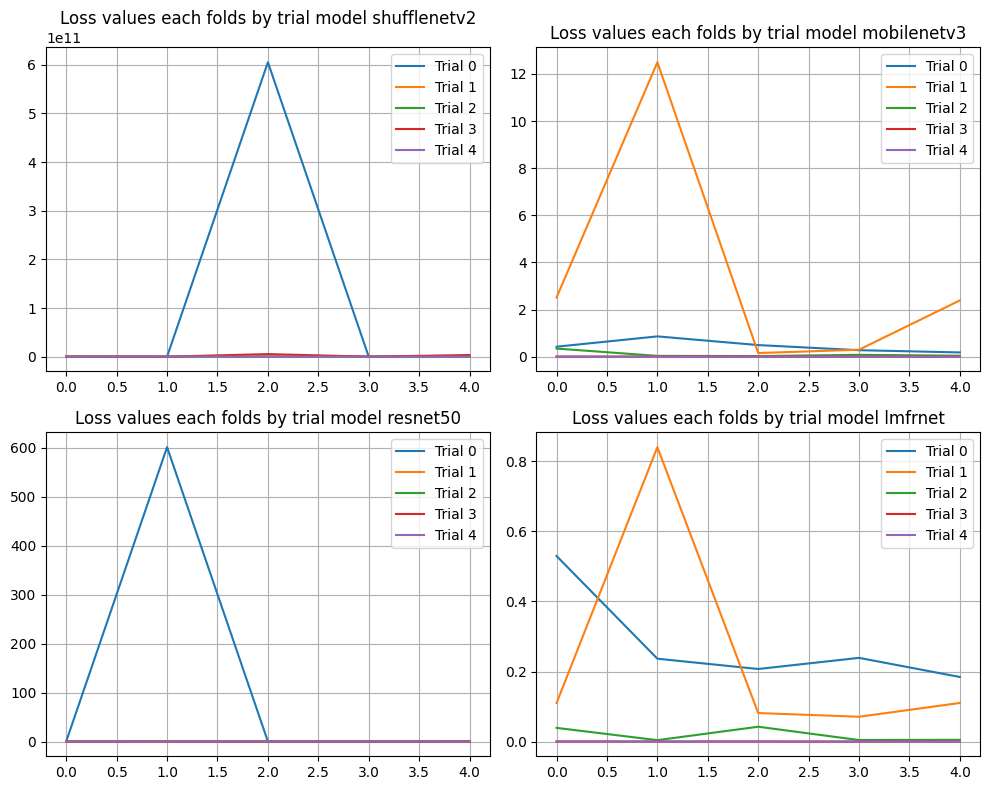

In [73]:
nama_model = ['shufflenetv2', 'mobilenetv3', 'resnet50', 'lmfrnet']

row = 0
col = 0

fig, axs = plt.subplots(2, 2, figsize=(10, 8)) # 2 rows, 2 columns, and set figure size

for model in nama_model:
    if (col>0) and ((col % 2) == 0):
        col = 0
        row += 1
        
    model_df = df_eval_loss[df_eval_loss['model'] == model]
    # print(shufflenetv2_df)

    df_exploded = model_df.explode('loss')

    # print("\nExploded DataFrame:")
    # print(df_exploded)
    print(f"{row}, {col}")

    # trial =  df_exploded['trial_no'].unique()
    # subset = df_exploded[df_exploded['trial_no'] == trial]

    for trial in df_exploded['trial_no'].unique():
        subset = df_exploded[df_exploded['trial_no'] == trial]
        # plt.plot(subset['loss'].reset_index(drop=True), label=f'Trial {trial}')
        # print(trial)
        axs[row, col].plot(subset['loss'].reset_index(drop=True), label=f'Trial {trial}')
        axs[row, col].set_title(f'Loss values each folds by trial model {model}')
        axs[row, col].legend()
        axs[row, col].grid(True)

    col += 1

plt.tight_layout()
# plt.title("Train loss each modesl")

# Display the plot
plt.show()

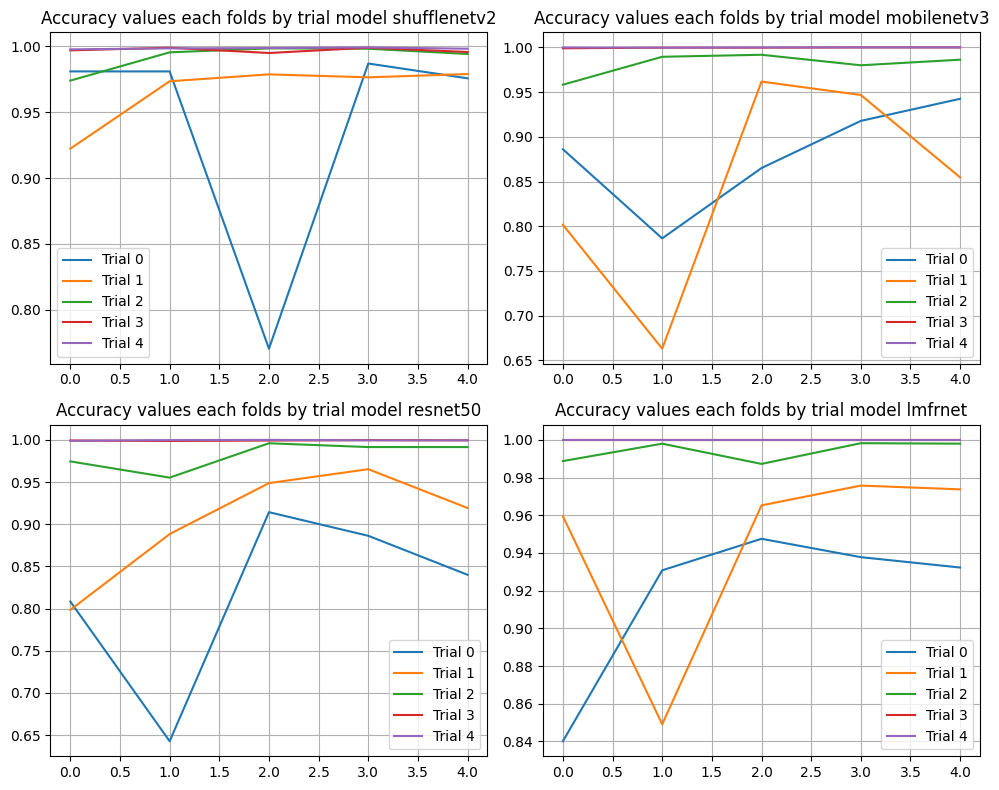

In [74]:
nama_model = ['shufflenetv2', 'mobilenetv3', 'resnet50', 'lmfrnet']

row = 0
col = 0

fig, axs = plt.subplots(2, 2, figsize=(10, 8)) # 2 rows, 2 columns, and set figure size

for model in nama_model:
    if (col>0) and ((col % 2) == 0):
        col = 0
        row += 1
        
    model_df = df_eval_accuracy[df_eval_accuracy['model'] == model]
    # print(shufflenetv2_df)

    df_exploded = model_df.explode('accuracy')

    # print("\nExploded DataFrame:")
    # print(df_exploded)
    # print(f"{row}, {col}")

    # trial =  df_exploded['trial_no'].unique()
    # subset = df_exploded[df_exploded['trial_no'] == trial]

    for trial in df_exploded['trial_no'].unique():
        subset = df_exploded[df_exploded['trial_no'] == trial]
        # plt.plot(subset['loss'].reset_index(drop=True), label=f'Trial {trial}')
        # print(trial)
        axs[row, col].plot(subset['accuracy'].reset_index(drop=True), label=f'Trial {trial}')
        axs[row, col].set_title(f'Accuracy values each folds by trial model {model}')
        axs[row, col].legend()
        axs[row, col].grid(True)

    col += 1

plt.tight_layout()

# Display the plot
plt.show()

In [13]:
model_name=[]
trial_no=[]
eval_loss = []
eval_accuracy = []
eval_precision = []
eval_recall = []
eval_f1score = []
eval_specificity = []
eval_auroc = []
eval_inference_time = []
eval_cpu_usage = []
eval_memory_usage = []
eval_gpu_usage = []
eval_gpu_memory_usage = []
for res in data_train_eval:
    # print(res)
    nama_model = res['model']
    trial_model = res['trial']

    # print(trial_model)
    for trial in trial_model:
        # print(trial)
        number_trial = trial['trial']        
        data_eval = trial['data']['eval']
        # print(number_trial)
        # print(data_eval)
        
        _loss = []
        _accuracy = []
        _precision = []
        _recall = []
        _f1score = []
        _specificity = []
        _auroc = []
        _inference_time = []
        _cpu_usage = []
        _memory_usage = []
        _gpu_usage = []
        _gpu_memory_usage = []

        for eval in data_eval:
            _loss.append(eval['loss'])
            _accuracy.append(eval['accuracy'])
            _precision.append(eval['precision'])
            _recall.append(eval['recall'])
            _f1score.append(eval['f1score'])
            _specificity.append(eval['specificity'])
            _auroc.append(eval['auroc'])
            _inference_time.append(eval['inference_time'])
            _cpu_usage.append(eval['cpu_usage'])
            _memory_usage.append(eval['memory_usage'])
            _gpu_usage.append(eval['gpu_usage'])
            _gpu_memory_usage.append(eval['gpu_memory_usage'])

        _loss = sum(_loss) / len(_loss)
        _accuracy = sum(_accuracy) / len(_accuracy)
        _precision = sum(_precision) / len(_precision)
        _recall =  sum(_recall) / len(_recall)
        _f1score = sum(_f1score) / len(_f1score)
        _specificity =  sum(_specificity) / len(_specificity)
        _auroc =  sum(_auroc) / len(_auroc)
        _inference_time =  sum(_inference_time) / len(_inference_time)
        _cpu_usage = sum(_cpu_usage) / len(_cpu_usage)
        _memory_usage = sum(_memory_usage) / len(_memory_usage)
        _gpu_usage =  sum(_gpu_usage) / len(_gpu_usage)
        _gpu_memory_usage = sum(_gpu_memory_usage) / len(_gpu_memory_usage)

        # print(_loss)
        # print(_accuracy)

        # print(data_eval['loss'])


        model_name.append(nama_model)
        trial_no.append(number_trial)
        eval_loss.append(f"{_loss:.4f}")
        eval_accuracy.append(f"{_accuracy:.4f}")
        eval_precision.append(f"{_precision:.4f}")
        eval_recall.append(f"{_recall:.4f}")
        eval_f1score.append(f"{_f1score:.4f}")
        eval_specificity.append(f"{_specificity:.4f}")
        eval_auroc.append(f"{_auroc:.4f}")
        eval_inference_time.append(f"{_inference_time:.4f}")
        eval_cpu_usage.append(f"{_cpu_usage:.4f}")
        eval_memory_usage.append(f"{_memory_usage:.4f}")
        eval_gpu_usage.append(f"{_gpu_usage:.4f}")
        eval_gpu_memory_usage.append(f"{_gpu_memory_usage:.4f}")
        # print(train_loss)

dict_data_val_loss = {
    "model": model_name,
    "trial_no": trial_no,
    "loss": eval_loss
}

dict_data_val_accuracy = {
    "model": model_name,
    "trial_no": trial_no,
    "accuracy": eval_accuracy
}

dict_data_val_precision = {
    "model": model_name,
    "trial_no": trial_no,
    "precision": eval_precision
}

# print(dict_data_val_loss)

dict_data_val_recall = {
    "model": model_name,
    "trial_no": trial_no,
    "recall": eval_recall
}

dict_data_val_f1score = {
    "model": model_name,
    "trial_no": trial_no,
    "f1score": eval_f1score
}

dict_data_val_specificity = {
    "model": model_name,
    "trial_no": trial_no,
    "specificity": eval_specificity
}

dict_data_val_auroc = {
    "model": model_name,
    "trial_no": trial_no,
    "auroc": eval_auroc
}

dict_data_val_inference_time = {
    "model": model_name,
    "trial_no": trial_no,
    "inference_time": eval_inference_time
}

dict_data_val_cpu_usage = {
    "model": model_name,
    "trial_no": trial_no,
    "cpu_usage": eval_cpu_usage
}

dict_data_val_memory_usage = {
    "model": model_name,
    "trial_no": trial_no,
    "memory_usage": eval_memory_usage
}

dict_data_val_gpu_usage = {
    "model": model_name,
    "trial_no": trial_no,
    "gpu_usage": eval_gpu_usage
}

dict_data_val_gpu_memory_usage = {
    "model": model_name,
    "trial_no": trial_no,
    "gpu_memory_usage": eval_gpu_memory_usage
}

# print(dict_data_val_accuracy)

In [22]:
df_eval_loss = pd.DataFrame.from_dict(dict_data_val_loss)
df_eval_accuracy = pd.DataFrame.from_dict(dict_data_val_accuracy)
df_eval_precision = pd.DataFrame.from_dict(dict_data_val_precision)
df_eval_recall = pd.DataFrame.from_dict(dict_data_val_recall)
df_eval_f1score = pd.DataFrame.from_dict(dict_data_val_f1score)
df_eval_specificity = pd.DataFrame.from_dict(dict_data_val_specificity)
df_eval_auroc = pd.DataFrame.from_dict(dict_data_val_auroc)
df_eval_inference_time = pd.DataFrame.from_dict(dict_data_val_inference_time)
df_eval_cpu_usage = pd.DataFrame.from_dict(dict_data_val_cpu_usage)
df_eval_memory_usage = pd.DataFrame.from_dict(dict_data_val_memory_usage)
df_eval_gpu_usage = pd.DataFrame.from_dict(dict_data_val_gpu_usage)
df_eval_gpu_memory_usage = pd.DataFrame.from_dict(dict_data_val_gpu_memory_usage)

In [35]:
# df_eval_precision
loss_shufflenetv2_df = df_eval_loss[df_eval_loss['model'] == 'shufflenetv2']
# loss_shufflenetv2_df
loss_shufflenetv2_df_new = loss_shufflenetv2_df.drop(columns=['model' , 'trial_no'], axis=1) # menghapus kolom model dan trial_no
# loss_shufflenetv2_df_new
loss_shufflenetv2_df_new.columns = ['ShuffleNetV2'] * len(loss_shufflenetv2_df_new.columns)
# loss_shufflenetv2_df_new
loss_shufflenetv2_df_transposed = loss_shufflenetv2_df_new.transpose()
loss_shufflenetv2_df_transposed_float = loss_shufflenetv2_df_transposed.astype(float)
# print(loss_shufflenetv2_df_transposed)

# print('\n')
loss_mobilenetv3_df = df_eval_loss[df_eval_loss['model'] == 'mobilenetv3']
# loss_mobilenetv3_df
loss_mobilenetv3_df_new = loss_mobilenetv3_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
loss_mobilenetv3_df_new.columns = ['MobileNetV3'] * len(loss_mobilenetv3_df_new.columns)
loss_mobilenetv3 = loss_mobilenetv3_df_new.reset_index(drop=True)
loss_mobilenetv3_df_transposed = loss_mobilenetv3.transpose()
loss_mobilenetv3_df_transposed_float = loss_mobilenetv3_df_transposed.astype(float)
# loss_mobilenetv3_df_transposed

loss_resnet50_df = df_eval_loss[df_eval_loss['model'] == 'resnet50']
# loss_mobilenetv3_df
loss_resnet50_df_new = loss_resnet50_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
loss_resnet50_df_new.columns = ['ResNet50'] * len(loss_resnet50_df_new.columns)
loss_resnet50 = loss_resnet50_df_new.reset_index(drop=True)
lossresnet50_df_transposed = loss_resnet50.T
lossresnet50_df_transposed_float = lossresnet50_df_transposed.astype(float)
# loss_resnet50_df_transposed

loss_lmfrnet_df = df_eval_loss[df_eval_loss['model'] == 'lmfrnet']
# loss_mobilenetv3_df
loss_lmfrnet_df_new = loss_lmfrnet_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
loss_lmfrnet_df_new.columns = ['LMFRNet'] * len(loss_mobilenetv3_df_new.columns)
loss_lmfrnet = loss_lmfrnet_df_new.reset_index(drop=True)
# loss_lmfrnet_transposed = loss_lmfrnet.transpose()
loss_lmfrnet_transposed = loss_lmfrnet.T
loss_lmfrnet_transposed_float = loss_lmfrnet_transposed.astype(float)
# loss_lmfrnet_transposed_float
# data = loss_mobilenetv3_df_transposed.iloc[0]
# data_mean = sum(data) / len(data)
# row_means = loss_lmfrnet_transposed.mean[0]

concate_df = pd.concat([loss_shufflenetv2_df_transposed_float, loss_mobilenetv3_df_transposed_float, lossresnet50_df_transposed_float, loss_lmfrnet_transposed_float], axis=0)
# concate_df.astype(float)
# # print(concate_df.dtypes)
concate_df['m_loss'] = concate_df.mean(axis=1)
concate_df

,0,1,2,3,4,m_loss
ShuffleNetV2,1.210660e+11,3.338489e+06,3.994928e+06,1.713372e+09,9.211967e+07,2.457576e+10
MobileNetV3,4.451000e-01,3.569300e+00,1.029000e-01,1.100000e-03,2.000000e-04,8.237200e-01
ResNet50,1.206158e+02,2.882000e-01,8.960000e-02,2.100000e-03,1.300000e-03,2.419940e+01
LMFRNet,2.794000e-01,2.427000e-01,1.900000e-02,3.000000e-04,1.000000e-04,1.083000e-01


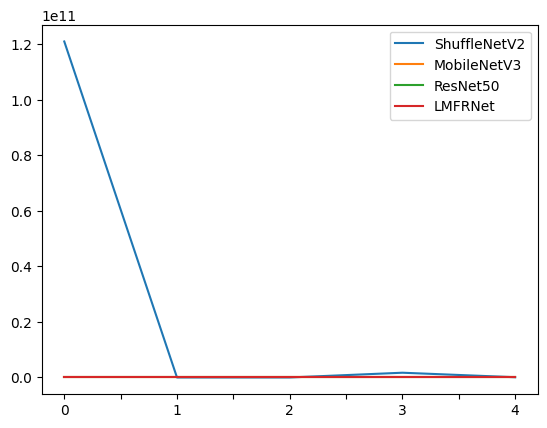

In [36]:
copy_concate_df = concate_df.drop('m_loss', axis=1)
df_loss = copy_concate_df.T
df_loss.plot()
plt.show()

In [37]:
# df_eval_precision
accuracy_shufflenetv2_df = df_eval_accuracy[df_eval_accuracy['model'] == 'shufflenetv2']
# accuracy_shufflenetv2_df
accuracy_shufflenetv2_df_new = accuracy_shufflenetv2_df.drop(columns=['model' , 'trial_no'], axis=1) # menghapus kolom model dan trial_no
# accuracy_shufflenetv2_df_new
accuracy_shufflenetv2_df_new.columns = ['ShuffleNetV2'] * len(accuracy_shufflenetv2_df_new.columns)
# accuracy_shufflenetv2_df_new
accuracy_shufflenetv2_df_transposed = accuracy_shufflenetv2_df_new.transpose()
accuracy_shufflenetv2_df_transposed_float = accuracy_shufflenetv2_df_transposed.astype(float)
# print(accuracy_shufflenetv2_df_transposed)

# print('\n')
accuracy_mobilenetv3_df = df_eval_accuracy[df_eval_accuracy['model'] == 'mobilenetv3']
# accuracy_mobilenetv3_df
accuracy_mobilenetv3_df_new = accuracy_mobilenetv3_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
accuracy_mobilenetv3_df_new.columns = ['MobileNetV3'] * len(accuracy_mobilenetv3_df_new.columns)
accuracy_mobilenetv3 = accuracy_mobilenetv3_df_new.reset_index(drop=True)
accuracy_mobilenetv3_df_transposed = accuracy_mobilenetv3.transpose()
accuracy_mobilenetv3_df_transposed_float = accuracy_mobilenetv3_df_transposed.astype(float)
# accuracy_mobilenetv3_df_transposed

accuracy_resnet50_df = df_eval_accuracy[df_eval_accuracy['model'] == 'resnet50']
# accuracy_mobilenetv3_df
accuracy_resnet50_df_new = accuracy_resnet50_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
accuracy_resnet50_df_new.columns = ['ResNet50'] * len(accuracy_resnet50_df_new.columns)
accuracy_resnet50 = accuracy_resnet50_df_new.reset_index(drop=True)
accuracyresnet50_df_transposed = accuracy_resnet50.T
accuracyresnet50_df_transposed_float = accuracyresnet50_df_transposed.astype(float)
# accuracy_resnet50_df_transposed

accuracy_lmfrnet_df = df_eval_accuracy[df_eval_accuracy['model'] == 'lmfrnet']
# accuracy_mobilenetv3_df
accuracy_lmfrnet_df_new = accuracy_lmfrnet_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
accuracy_lmfrnet_df_new.columns = ['LMFRNet'] * len(accuracy_mobilenetv3_df_new.columns)
accuracy_lmfrnet = accuracy_lmfrnet_df_new.reset_index(drop=True)
# accuracy_lmfrnet_transposed = accuracy_lmfrnet.transpose()
accuracy_lmfrnet_transposed = accuracy_lmfrnet.T
accuracy_lmfrnet_transposed_float = accuracy_lmfrnet_transposed.astype(float)
# accuracy_lmfrnet_transposed_float
# data = accuracy_mobilenetv3_df_transposed.iloc[0]
# data_mean = sum(data) / len(data)
# row_means = accuracy_lmfrnet_transposed.mean[0]

concate_df = pd.concat([accuracy_shufflenetv2_df_transposed_float, accuracy_mobilenetv3_df_transposed_float, accuracyresnet50_df_transposed_float, accuracy_lmfrnet_transposed_float], axis=0)
# concate_df.astype(float)
# # print(concate_df.dtypes)
concate_df['m_accuracy'] = concate_df.mean(axis=1)
concate_df

,0,1,2,3,4,m_accuracy
ShuffleNetV2,0.9390,0.9660,0.9921,0.9972,0.9985,0.97856
MobileNetV3,0.8796,0.8456,0.9812,0.9997,1.0000,0.94122
ResNet50,0.8184,0.9040,0.9818,0.9993,0.9996,0.94062
LMFRNet,0.9177,0.9447,0.9941,1.0000,1.0000,0.97130


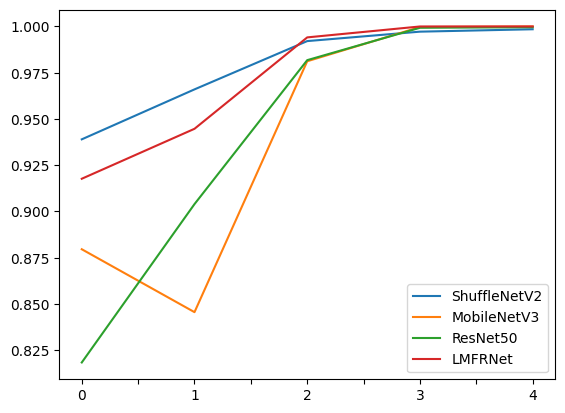

In [39]:
copy_concate_df = concate_df.drop('m_accuracy', axis=1)
df_accuracy = copy_concate_df.T
df_accuracy.plot()
plt.show()

In [40]:
# df_eval_precision
precission_shufflenetv2_df = df_eval_precision[df_eval_precision['model'] == 'shufflenetv2']
# precission_shufflenetv2_df
precission_shufflenetv2_df_new = precission_shufflenetv2_df.drop(columns=['model' , 'trial_no'], axis=1) # menghapus kolom model dan trial_no
# precission_shufflenetv2_df_new
precission_shufflenetv2_df_new.columns = ['ShuffleNetV2'] * len(precission_shufflenetv2_df_new.columns)
# precission_shufflenetv2_df_new
precission_shufflenetv2_df_transposed = precission_shufflenetv2_df_new.transpose()
precission_shufflenetv2_df_transposed_float = precission_shufflenetv2_df_transposed.astype(float)
# print(precission_shufflenetv2_df_transposed)

# print('\n')
precission_mobilenetv3_df = df_eval_precision[df_eval_precision['model'] == 'mobilenetv3']
# precission_mobilenetv3_df
precission_mobilenetv3_df_new = precission_mobilenetv3_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
precission_mobilenetv3_df_new.columns = ['MobileNetV3'] * len(precission_mobilenetv3_df_new.columns)
precission_mobilenetv3 = precission_mobilenetv3_df_new.reset_index(drop=True)
precission_mobilenetv3_df_transposed = precission_mobilenetv3.transpose()
precission_mobilenetv3_df_transposed_float = precission_mobilenetv3_df_transposed.astype(float)
# precission_mobilenetv3_df_transposed

precission_resnet50_df = df_eval_precision[df_eval_precision['model'] == 'resnet50']
# precission_mobilenetv3_df
precission_resnet50_df_new = precission_resnet50_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
precission_resnet50_df_new.columns = ['ResNet50'] * len(precission_resnet50_df_new.columns)
precission_resnet50 = precission_resnet50_df_new.reset_index(drop=True)
precissionresnet50_df_transposed = precission_resnet50.T
precissionresnet50_df_transposed_float = precissionresnet50_df_transposed.astype(float)
# precission_resnet50_df_transposed

precission_lmfrnet_df = df_eval_precision[df_eval_precision['model'] == 'lmfrnet']
# precission_mobilenetv3_df
precission_lmfrnet_df_new = precission_lmfrnet_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
precission_lmfrnet_df_new.columns = ['LMFRNet'] * len(precission_mobilenetv3_df_new.columns)
precission_lmfrnet = precission_lmfrnet_df_new.reset_index(drop=True)
# precission_lmfrnet_transposed = precission_lmfrnet.transpose()
precission_lmfrnet_transposed = precission_lmfrnet.T
precission_lmfrnet_transposed_float = precission_lmfrnet_transposed.astype(float)
# precission_lmfrnet_transposed_float
# data = precission_mobilenetv3_df_transposed.iloc[0]
# data_mean = sum(data) / len(data)
# row_means = precission_lmfrnet_transposed.mean[0]

concate_df = pd.concat([precission_shufflenetv2_df_transposed_float, precission_mobilenetv3_df_transposed_float, precissionresnet50_df_transposed_float, precission_lmfrnet_transposed_float], axis=0)
# concate_df.astype(float)
# # print(concate_df.dtypes)
concate_df['m_precission'] = concate_df.mean(axis=1)
concate_df



,0,1,2,3,4,m_precission
ShuffleNetV2,0.9225,0.9756,0.9961,0.9948,0.9972,0.97724
MobileNetV3,0.9260,0.8059,0.9717,0.9997,0.9999,0.94064
ResNet50,0.8074,0.9586,0.9726,0.9990,0.9995,0.94742
LMFRNet,0.9528,0.9807,0.9902,1.0000,1.0000,0.98474


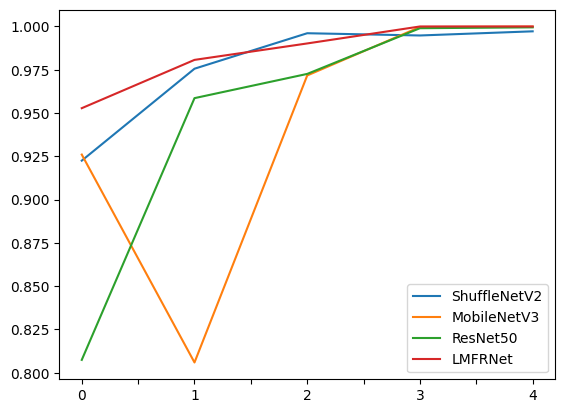

In [41]:
copy_concate_df = concate_df.drop('m_precission', axis=1)
df_precision = copy_concate_df.T
df_precision.plot()
plt.show()

In [42]:
# df_eval_precision
recall_shufflenetv2_df = df_eval_recall[df_eval_recall['model'] == 'shufflenetv2']
# recall_shufflenetv2_df
recall_shufflenetv2_df_new = recall_shufflenetv2_df.drop(columns=['model' , 'trial_no'], axis=1) # menghapus kolom model dan trial_no
# recall_shufflenetv2_df_new
recall_shufflenetv2_df_new.columns = ['ShuffleNetV2'] * len(recall_shufflenetv2_df_new.columns)
# recall_shufflenetv2_df_new
recall_shufflenetv2_df_transposed = recall_shufflenetv2_df_new.transpose()
recall_shufflenetv2_df_transposed_float = recall_shufflenetv2_df_transposed.astype(float)
# print(recall_shufflenetv2_df_transposed)

# print('\n')
recall_mobilenetv3_df = df_eval_recall[df_eval_recall['model'] == 'mobilenetv3']
# recall_mobilenetv3_df
recall_mobilenetv3_df_new = recall_mobilenetv3_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
recall_mobilenetv3_df_new.columns = ['MobileNetV3'] * len(recall_mobilenetv3_df_new.columns)
recall_mobilenetv3 = recall_mobilenetv3_df_new.reset_index(drop=True)
recall_mobilenetv3_df_transposed = recall_mobilenetv3.transpose()
recall_mobilenetv3_df_transposed_float = recall_mobilenetv3_df_transposed.astype(float)
# recall_mobilenetv3_df_transposed

recall_resnet50_df = df_eval_recall[df_eval_recall['model'] == 'resnet50']
# recall_mobilenetv3_df
recall_resnet50_df_new = recall_resnet50_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
recall_resnet50_df_new.columns = ['ResNet50'] * len(recall_resnet50_df_new.columns)
recall_resnet50 = recall_resnet50_df_new.reset_index(drop=True)
recallresnet50_df_transposed = recall_resnet50.T
recallresnet50_df_transposed_float = recallresnet50_df_transposed.astype(float)
# recall_resnet50_df_transposed

recall_lmfrnet_df = df_eval_recall[df_eval_recall['model'] == 'lmfrnet']
# recall_mobilenetv3_df
recall_lmfrnet_df_new = recall_lmfrnet_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
recall_lmfrnet_df_new.columns = ['LMFRNet'] * len(recall_mobilenetv3_df_new.columns)
recall_lmfrnet = recall_lmfrnet_df_new.reset_index(drop=True)
# recall_lmfrnet_transposed = recall_lmfrnet.transpose()
recall_lmfrnet_transposed = recall_lmfrnet.T
recall_lmfrnet_transposed_float = recall_lmfrnet_transposed.astype(float)
# recall_lmfrnet_transposed_float
# data = recall_mobilenetv3_df_transposed.iloc[0]
# data_mean = sum(data) / len(data)
# row_means = recall_lmfrnet_transposed.mean[0]

concate_df = pd.concat([recall_shufflenetv2_df_transposed_float, recall_mobilenetv3_df_transposed_float, recallresnet50_df_transposed_float, recall_lmfrnet_transposed_float], axis=0)
# concate_df.astype(float)
# # print(concate_df.dtypes)
concate_df['m_recall'] = concate_df.mean(axis=1)
concate_df


,0,1,2,3,4,m_recall
ShuffleNetV2,0.9757,0.9570,0.9882,0.9995,0.9998,0.98404
MobileNetV3,0.8396,0.9716,0.9916,0.9997,1.0000,0.96050
ResNet50,0.8870,0.8491,0.9924,0.9996,0.9996,0.94554
LMFRNet,0.8789,0.9083,0.9980,1.0000,1.0000,0.95704


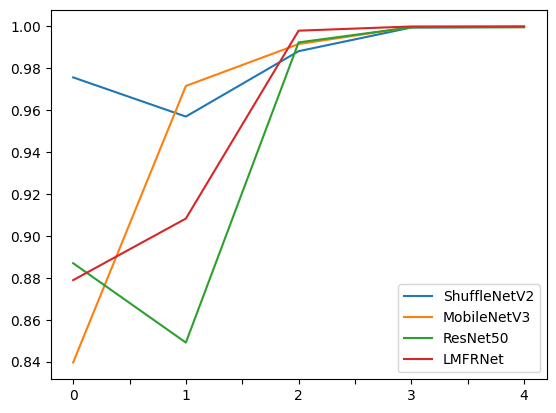

In [43]:
copy_concate_df = concate_df.drop('m_recall', axis=1)
df_recall = copy_concate_df.T
df_recall.plot()
plt.show()

In [44]:
# df_eval_precision
f1score_shufflenetv2_df = df_eval_f1score[df_eval_f1score['model'] == 'shufflenetv2']
# f1score_shufflenetv2_df
f1score_shufflenetv2_df_new = f1score_shufflenetv2_df.drop(columns=['model' , 'trial_no'], axis=1) # menghapus kolom model dan trial_no
# f1score_shufflenetv2_df_new
f1score_shufflenetv2_df_new.columns = ['ShuffleNetV2'] * len(f1score_shufflenetv2_df_new.columns)
# f1score_shufflenetv2_df_new
f1score_shufflenetv2_df_transposed = f1score_shufflenetv2_df_new.transpose()
f1score_shufflenetv2_df_transposed_float = f1score_shufflenetv2_df_transposed.astype(float)
# print(f1score_shufflenetv2_df_transposed)

# print('\n')
f1score_mobilenetv3_df = df_eval_f1score[df_eval_f1score['model'] == 'mobilenetv3']
# f1score_mobilenetv3_df
f1score_mobilenetv3_df_new = f1score_mobilenetv3_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
f1score_mobilenetv3_df_new.columns = ['MobileNetV3'] * len(f1score_mobilenetv3_df_new.columns)
f1score_mobilenetv3 = f1score_mobilenetv3_df_new.reset_index(drop=True)
f1score_mobilenetv3_df_transposed = f1score_mobilenetv3.transpose()
f1score_mobilenetv3_df_transposed_float = f1score_mobilenetv3_df_transposed.astype(float)
# f1score_mobilenetv3_df_transposed

f1score_resnet50_df = df_eval_f1score[df_eval_f1score['model'] == 'resnet50']
# f1score_mobilenetv3_df
f1score_resnet50_df_new = f1score_resnet50_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
f1score_resnet50_df_new.columns = ['ResNet50'] * len(f1score_resnet50_df_new.columns)
f1score_resnet50 = f1score_resnet50_df_new.reset_index(drop=True)
f1scoreresnet50_df_transposed = f1score_resnet50.T
f1scoreresnet50_df_transposed_float = f1scoreresnet50_df_transposed.astype(float)
# f1score_resnet50_df_transposed

f1score_lmfrnet_df = df_eval_f1score[df_eval_f1score['model'] == 'lmfrnet']
# f1score_mobilenetv3_df
f1score_lmfrnet_df_new = f1score_lmfrnet_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
f1score_lmfrnet_df_new.columns = ['LMFRNet'] * len(f1score_mobilenetv3_df_new.columns)
f1score_lmfrnet = f1score_lmfrnet_df_new.reset_index(drop=True)
# f1score_lmfrnet_transposed = f1score_lmfrnet.transpose()
f1score_lmfrnet_transposed = f1score_lmfrnet.T
f1score_lmfrnet_transposed_float = f1score_lmfrnet_transposed.astype(float)
# f1score_lmfrnet_transposed_float
# data = f1score_mobilenetv3_df_transposed.iloc[0]
# data_mean = sum(data) / len(data)
# row_means = f1score_lmfrnet_transposed.mean[0]

concate_df = pd.concat([f1score_shufflenetv2_df_transposed_float, f1score_mobilenetv3_df_transposed_float, f1scoreresnet50_df_transposed_float, f1score_lmfrnet_transposed_float], axis=0)
# concate_df.astype(float)
# # print(concate_df.dtypes)
concate_df['m_f1score'] = concate_df.mean(axis=1)
concate_df

,0,1,2,3,4,m_f1score
ShuffleNetV2,0.9457,0.9653,0.9920,0.9972,0.9985,0.97974
MobileNetV3,0.8662,0.8717,0.9814,0.9997,1.0000,0.94380
ResNet50,0.8359,0.8910,0.9822,0.9993,0.9996,0.94160
LMFRNet,0.9124,0.9390,0.9941,1.0000,1.0000,0.96910


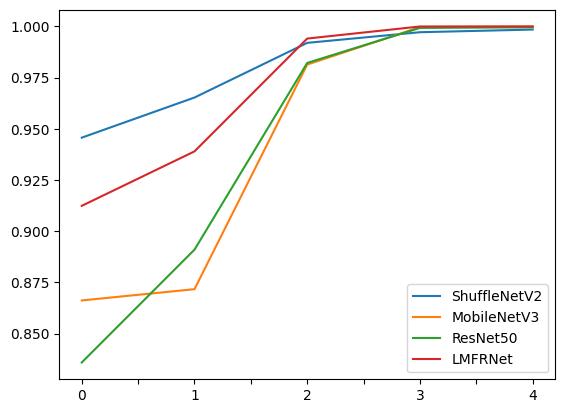

In [45]:
copy_concate_df = concate_df.drop('m_f1score', axis=1)
df_f1score = copy_concate_df.T
df_f1score.plot()
plt.show()

In [46]:
# df_eval_precision
inference_time_shufflenetv2_df = df_eval_inference_time[df_eval_inference_time['model'] == 'shufflenetv2']
# inference_time_shufflenetv2_df
inference_time_shufflenetv2_df_new = inference_time_shufflenetv2_df.drop(columns=['model' , 'trial_no'], axis=1) # menghapus kolom model dan trial_no
# inference_time_shufflenetv2_df_new
inference_time_shufflenetv2_df_new.columns = ['ShuffleNetV2'] * len(inference_time_shufflenetv2_df_new.columns)
# inference_time_shufflenetv2_df_new
inference_time_shufflenetv2_df_transposed = inference_time_shufflenetv2_df_new.transpose()
inference_time_shufflenetv2_df_transposed_float = inference_time_shufflenetv2_df_transposed.astype(float)
# print(inference_time_shufflenetv2_df_transposed)

# print('\n')
inference_time_mobilenetv3_df = df_eval_inference_time[df_eval_inference_time['model'] == 'mobilenetv3']
# inference_time_mobilenetv3_df
inference_time_mobilenetv3_df_new = inference_time_mobilenetv3_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
inference_time_mobilenetv3_df_new.columns = ['MobileNetV3'] * len(inference_time_mobilenetv3_df_new.columns)
inference_time_mobilenetv3 = inference_time_mobilenetv3_df_new.reset_index(drop=True)
inference_time_mobilenetv3_df_transposed = inference_time_mobilenetv3.transpose()
inference_time_mobilenetv3_df_transposed_float = inference_time_mobilenetv3_df_transposed.astype(float)
# inference_time_mobilenetv3_df_transposed

inference_time_resnet50_df = df_eval_inference_time[df_eval_inference_time['model'] == 'resnet50']
# inference_time_mobilenetv3_df
inference_time_resnet50_df_new = inference_time_resnet50_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
inference_time_resnet50_df_new.columns = ['ResNet50'] * len(inference_time_resnet50_df_new.columns)
inference_time_resnet50 = inference_time_resnet50_df_new.reset_index(drop=True)
inference_timeresnet50_df_transposed = inference_time_resnet50.T
inference_timeresnet50_df_transposed_float = inference_timeresnet50_df_transposed.astype(float)
# inference_time_resnet50_df_transposed

inference_time_lmfrnet_df = df_eval_inference_time[df_eval_inference_time['model'] == 'lmfrnet']
# inference_time_mobilenetv3_df
inference_time_lmfrnet_df_new = inference_time_lmfrnet_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
inference_time_lmfrnet_df_new.columns = ['LMFRNet'] * len(inference_time_mobilenetv3_df_new.columns)
inference_time_lmfrnet = inference_time_lmfrnet_df_new.reset_index(drop=True)
# inference_time_lmfrnet_transposed = inference_time_lmfrnet.transpose()
inference_time_lmfrnet_transposed = inference_time_lmfrnet.T
inference_time_lmfrnet_transposed_float = inference_time_lmfrnet_transposed.astype(float)
# inference_time_lmfrnet_transposed_float
# data = inference_time_mobilenetv3_df_transposed.iloc[0]
# data_mean = sum(data) / len(data)
# row_means = inference_time_lmfrnet_transposed.mean[0]

concate_df = pd.concat([inference_time_shufflenetv2_df_transposed_float, inference_time_mobilenetv3_df_transposed_float, inference_timeresnet50_df_transposed_float, inference_time_lmfrnet_transposed_float], axis=0)
# concate_df.astype(float)
# # print(concate_df.dtypes)
concate_df['m_inference_time'] = concate_df.mean(axis=1)
concate_df

,0,1,2,3,4,m_inference_time
ShuffleNetV2,140.7483,48.5894,140.8762,140.0499,79.1716,109.88708
MobileNetV3,140.6260,48.5120,139.7422,139.5479,79.8891,109.66344
ResNet50,140.5726,49.7858,141.5585,141.5190,80.7748,110.84214
LMFRNet,142.5969,52.4390,143.6600,143.5126,79.8163,112.40496


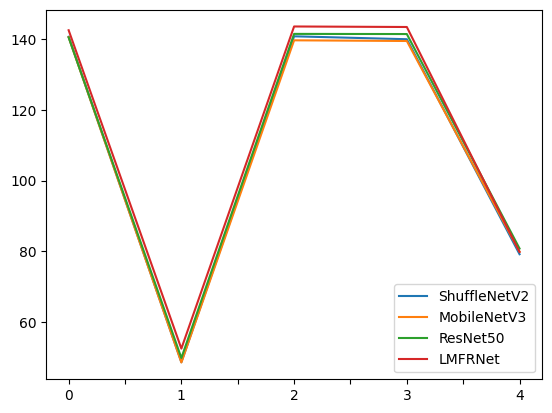

In [47]:
copy_concate_df = concate_df.drop('m_inference_time', axis=1)
df_inference_time = copy_concate_df.T
df_inference_time.plot()
plt.show()

In [48]:
# df_eval_precision
auroc_shufflenetv2_df = df_eval_auroc[df_eval_auroc['model'] == 'shufflenetv2']
# auroc_shufflenetv2_df
auroc_shufflenetv2_df_new = auroc_shufflenetv2_df.drop(columns=['model' , 'trial_no'], axis=1) # menghapus kolom model dan trial_no
# auroc_shufflenetv2_df_new
auroc_shufflenetv2_df_new.columns = ['ShuffleNetV2'] * len(auroc_shufflenetv2_df_new.columns)
# auroc_shufflenetv2_df_new
auroc_shufflenetv2_df_transposed = auroc_shufflenetv2_df_new.transpose()
auroc_shufflenetv2_df_transposed_float = auroc_shufflenetv2_df_transposed.astype(float)
# print(auroc_shufflenetv2_df_transposed)

# print('\n')
auroc_mobilenetv3_df = df_eval_auroc[df_eval_auroc['model'] == 'mobilenetv3']
# auroc_mobilenetv3_df
auroc_mobilenetv3_df_new = auroc_mobilenetv3_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
auroc_mobilenetv3_df_new.columns = ['MobileNetV3'] * len(auroc_mobilenetv3_df_new.columns)
auroc_mobilenetv3 = auroc_mobilenetv3_df_new.reset_index(drop=True)
auroc_mobilenetv3_df_transposed = auroc_mobilenetv3.transpose()
auroc_mobilenetv3_df_transposed_float = auroc_mobilenetv3_df_transposed.astype(float)
# auroc_mobilenetv3_df_transposed

auroc_resnet50_df = df_eval_auroc[df_eval_auroc['model'] == 'resnet50']
# auroc_mobilenetv3_df
auroc_resnet50_df_new = auroc_resnet50_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
auroc_resnet50_df_new.columns = ['ResNet50'] * len(auroc_resnet50_df_new.columns)
auroc_resnet50 = auroc_resnet50_df_new.reset_index(drop=True)
aurocresnet50_df_transposed = auroc_resnet50.T
aurocresnet50_df_transposed_float = aurocresnet50_df_transposed.astype(float)
# auroc_resnet50_df_transposed

auroc_lmfrnet_df = df_eval_auroc[df_eval_auroc['model'] == 'lmfrnet']
# auroc_mobilenetv3_df
auroc_lmfrnet_df_new = auroc_lmfrnet_df.drop(columns=['model', 'trial_no'], axis=1) # menghapus kolom model dan trial_no
auroc_lmfrnet_df_new.columns = ['LMFRNet'] * len(auroc_mobilenetv3_df_new.columns)
auroc_lmfrnet = auroc_lmfrnet_df_new.reset_index(drop=True)
# auroc_lmfrnet_transposed = auroc_lmfrnet.transpose()
auroc_lmfrnet_transposed = auroc_lmfrnet.T
auroc_lmfrnet_transposed_float = auroc_lmfrnet_transposed.astype(float)
# auroc_lmfrnet_transposed_float
# data = auroc_mobilenetv3_df_transposed.iloc[0]
# data_mean = sum(data) / len(data)
# row_means = auroc_lmfrnet_transposed.mean[0]

concate_df = pd.concat([auroc_shufflenetv2_df_transposed_float, auroc_mobilenetv3_df_transposed_float, aurocresnet50_df_transposed_float, auroc_lmfrnet_transposed_float], axis=0)
# concate_df.astype(float)
# # print(concate_df.dtypes)
concate_df['m_auroc'] = concate_df.mean(axis=1)
concate_df

,0,1,2,3,4,m_auroc
ShuffleNetV2,0.9390,0.9663,0.9921,0.9971,0.9985,0.97860
MobileNetV3,0.8791,0.8459,0.9812,0.9997,0.9999,0.94116
ResNet50,0.8180,0.9036,0.9817,0.9993,0.9996,0.94044
LMFRNet,0.9177,0.9446,0.9941,1.0000,1.0000,0.97128


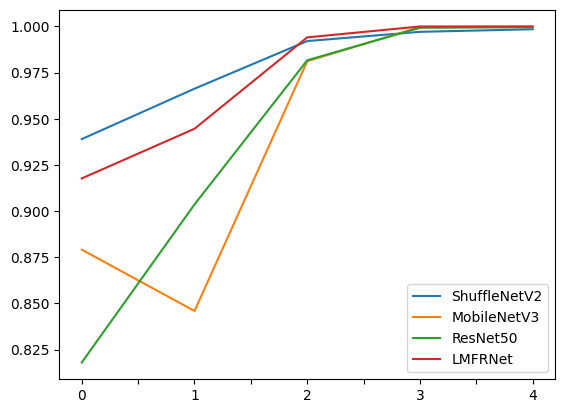

In [49]:
copy_concate_df = concate_df.drop('m_auroc', axis=1)
df_aucroc = copy_concate_df.T
df_aucroc.plot()
plt.show()

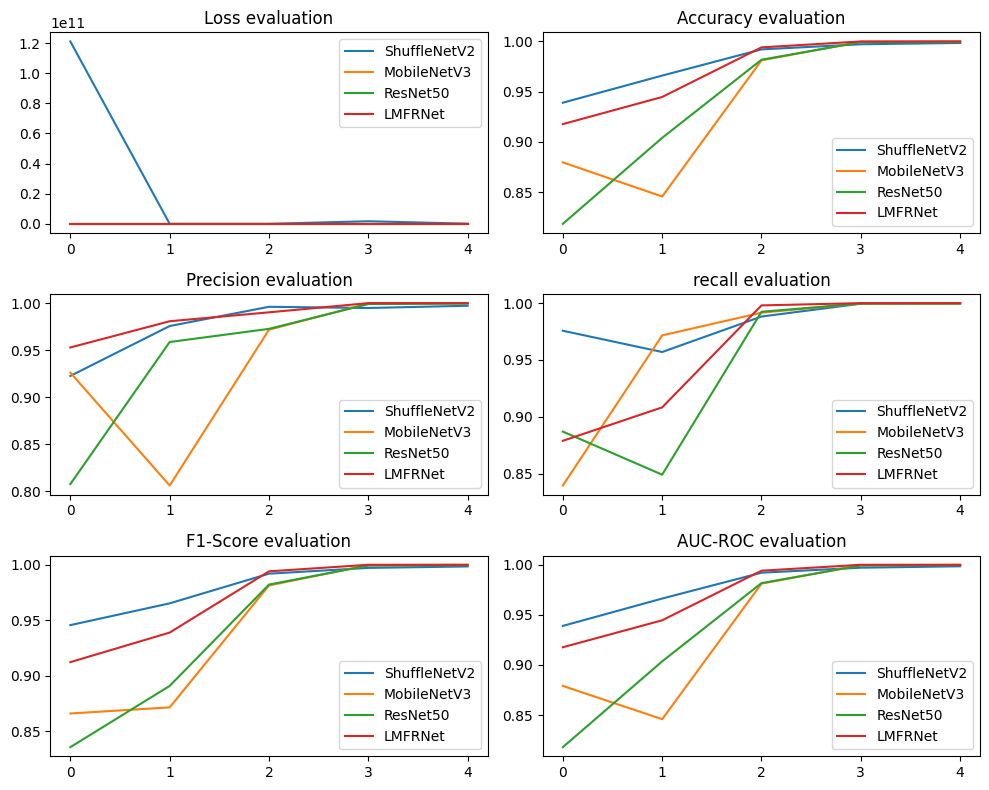

In [57]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8)) # 2 row, 2 columns

df_loss.plot(ax=axes[0, 0], title='Loss evaluation')
df_accuracy.plot(ax=axes[0, 1], title='Accuracy evaluation')
df_precision.plot(ax=axes[1, 0], title='Precision evaluation')
df_recall.plot(ax=axes[1, 1], title='recall evaluation')
df_f1score.plot(ax=axes[2, 0], title='F1-Score evaluation')
df_aucroc.plot(ax=axes[2, 1], title='AUC-ROC evaluation')

plt.tight_layout()
plt.show()
